In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
from input_parser import InputParser
from abstract_simulator import AbstractMachineSimulator
from abstract_grapher import graph_abstract_machine

In [194]:
parser = InputParser("""

// This is a comment.

// Data section
.DATA

STACK q0
QUEUE q1
TAPE T2

// Logic section
.LOGIC

// State Transitions
q0] SCAN (0,q0), (1,q1), (1,accept)
q1] SCAN (0,q0), (1,q2)
q2] SCAN (0,q0), (1,q1), (1,accept)

""")

In [176]:
parser = InputParser("""
.DATA
STACK S1
STACK S2
.LOGIC
A] WRITE(S1) (#,B)
B] SCAN (a,C), (b,E)
C] WRITE(S1) (X,B)
D] WRITE(S2) (X,F)
E] READ(S1) (X,D)
F] SCAN (b,E), (c,G)
G] READ(S2) (X,H)
H] SCAN (c,G), (#,I)
I] READ(S1) (#,J)
J] READ(S2) (#,accept)
""")

In [188]:
parser = InputParser("""
.DATA
TAPE T1
.LOGIC
A] RIGHT(T1) (0/X,B), (Y/Y,D), (1/1,reject)
B] RIGHT(T1) (0/0,B), (Y/Y,B), (1/Y,C)
C] LEFT(T1) (0/0,C), (Y/Y,C), (X/X,A)
D] RIGHT(T1) (Y/Y,D), (#/#,accept), (1/1,reject)
""")

In [200]:
parser = InputParser("""
.LOGIC
q0] SCAN (0,q0), (1,q1), (1,accept)
q1] SCAN (0,q0), (1,q2)
q2] SCAN (0,q0), (1,q1), (1,accept)
""")

In [199]:
parsed = parser.parse()
parsed

KeyboardInterrupt: 

In [197]:
simulator = AbstractMachineSimulator(parsed)
simulator.state_map

{'q0': {'instruction': 'SCAN',
  'associated_data': None,
  'transitions': {'0': 'q0', '1': 'accept'}},
 'q1': {'instruction': 'SCAN',
  'associated_data': None,
  'transitions': {'0': 'q0', '1': 'q2'}},
 'q2': {'instruction': 'SCAN',
  'associated_data': None,
  'transitions': {'0': 'q0', '1': 'accept'}}}

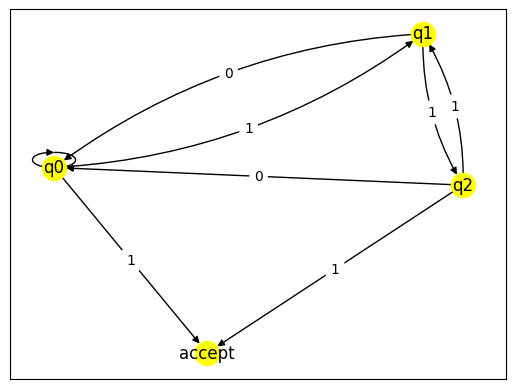

In [196]:
graph_abstract_machine(parsed['logic'])

In [192]:
input_tape = "#aabbcc#"
simulator.set_input_tape(input_tape)
simulator.input_tape.__str__()


'[#]aabbcc#'

In [193]:
simulator.step(verbose=True)
str(simulator.input_tape)

Starting at state A
{'0/X': 'B', 'Y/Y': 'D', '1/1': 'reject'}
No transition found for this symbol. Machine halted.


'[#]aabbcc#'

In [174]:
simulator.accepted

True